In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


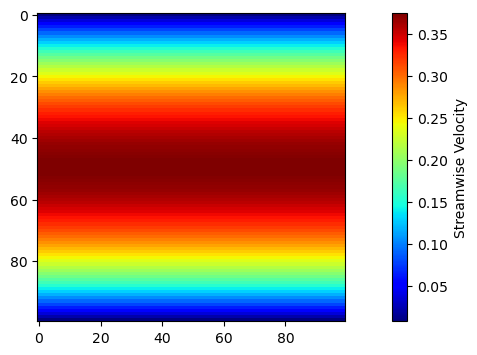

In [3]:
with h5py.File('channel.h5', 'r') as hf:
    keys = list(hf.keys())
    c_key_idx = np.sort([int(k.split('.')[-1]) for k in keys if 'velocity_x' in k])

    plot_var = hf['velocity_x.'+str(c_key_idx[-1])][()]
    plt.figure(figsize=(12, 4))
    im = plt.imshow(plot_var, cmap='jet')
    cbar = plt.colorbar(im)
    cbar.set_label('Streamwise Velocity')

In [4]:

H = 1.0
mu = 0.01
dp_dx = -10.0

y = np.linspace(0, H, 201)

u = (1 / (2 * mu)) * dp_dx * (y**2 - H * y)

u_lbm = plot_var[:, 0]
y_lbm = np.linspace(0, H, 100)


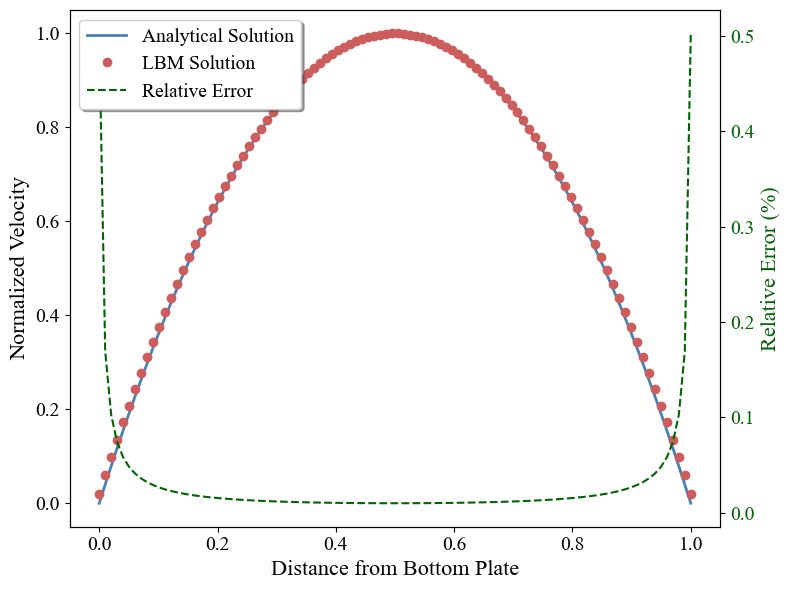

In [5]:
normalized_u = u / np.max(u)
normalized_u_lbm = u_lbm / np.max(u_lbm)
error_ind = np.arange(1, 200, 2)
error = []
for i in range(len(error_ind)):
  error.append(np.abs(normalized_u[error_ind[i]] - normalized_u_lbm[i]) / normalized_u[error_ind[i]] * 100)
# error = np.abs(normalized_u - normalized_u_lbm) / normalized_u* 100
error = np.array(error)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(y, normalized_u, label='Analytical Solution', color='steelblue', linewidth=2)
ax1.plot(y_lbm, normalized_u_lbm, label='LBM Solution', color='indianred', marker='o', linestyle='None', markersize=6) 

ax1.set_ylabel('Normalized Velocity', fontsize=16) 
ax1.set_xlabel('Distance from Bottom Plate', fontsize=16)
# ax1.set_title('Comparison of Poiseuille Flow Profiles', fontsize=18, fontweight='bold')

ax2 = ax1.twinx()
ax2.plot(y_lbm, error, label='Relative Error', color='darkgreen', linestyle='--', linewidth=1.5)
ax2.set_ylabel('Relative Error (%)', fontsize=16, color='darkgreen')

# Increase tick parameters
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='y', labelsize=14, labelcolor='darkgreen')

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

# Increase legend font size
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=14, frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

In [73]:
np.abs(normalized_u[error_ind[0]] - normalized_u_lbm[0])/normalized_u[error_ind[0]] * 100

np.float64(3.9144867127416902)